In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
df.fillna(0,inplace=True)
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

In [5]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,645675.000000,645675.000000
mean,8.635879,1.236498
std,13.609659,1.356613
min,-45.389000,0.000000
25%,-0.106000,0.294000
50%,10.376000,0.606000
75%,19.533000,1.773000
max,36.339000,12.646000


In [6]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')

In [7]:
df.shape

(645675, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             645675 non-null  float64
 2   AverageTemperatureUncertainty  645675 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


           dt  AverageTemperature  AverageTemperatureUncertainty State Country
0  1855-05-01              25.544                          1.171  Acre  Brazil
1  1855-06-01              24.228                          1.103  Acre  Brazil
2  1855-07-01              24.371                          1.044  Acre  Brazil
3  1855-08-01              25.427                          1.073  Acre  Brazil
4  1855-09-01              25.675                          1.014  Acre  Brazil


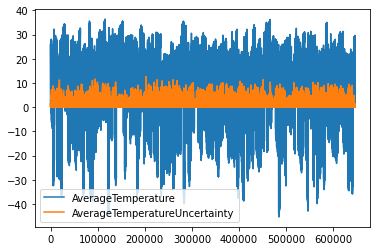

In [9]:
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
print(df.head())
df.plot()
pyplot.show()

In [10]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
df.drop(['AverageTemperatureUncertainty', 'State','Country'],axis=1,inplace=True)

In [13]:
df.head()

,dt,AverageTemperature
0,1855-05-01,25.544
1,1855-06-01,24.228
2,1855-07-01,24.371
3,1855-08-01,25.427
4,1855-09-01,25.675


In [17]:
def adfuller_test(averageTemperature):
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    result=adfuller(averageTemperature)
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )


adfuller_test(df['AverageTemperature'])

ADF Test Statistic : -14.530062343278011
p-value : 5.349542726787025e-27
#Lags Used : 108
Number of Observations : 645566


In [18]:
df[' First Difference'] = df['AverageTemperature'] - df['AverageTemperature'].shift(1)
df['Seasonal First Difference']=df['AverageTemperature']-df['AverageTemperature'].shift(12)
df.head()

,dt,AverageTemperature,First Difference,Seasonal First Difference
0,1855-05-01,25.544,NaN,NaN
1,1855-06-01,24.228,-1.316,NaN
2,1855-07-01,24.371,0.143,NaN
3,1855-08-01,25.427,1.056,NaN
4,1855-09-01,25.675,0.248,NaN


In [19]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -93.47165864595887
p-value : 0.0
#Lags Used : 108
Number of Observations : 645554


<AxesSubplot:>

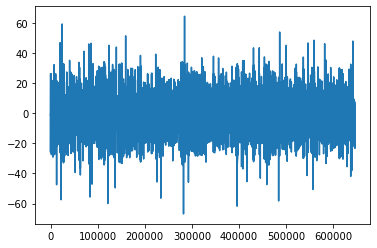

In [20]:
df['Seasonal First Difference'].plot()

NameError: name 'plt' is not defined

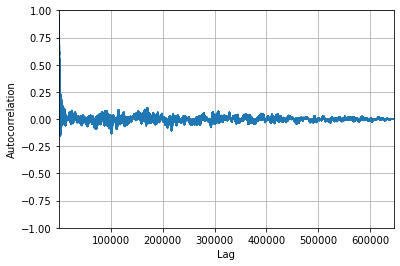

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['AverageTemperature'])
plt.show()

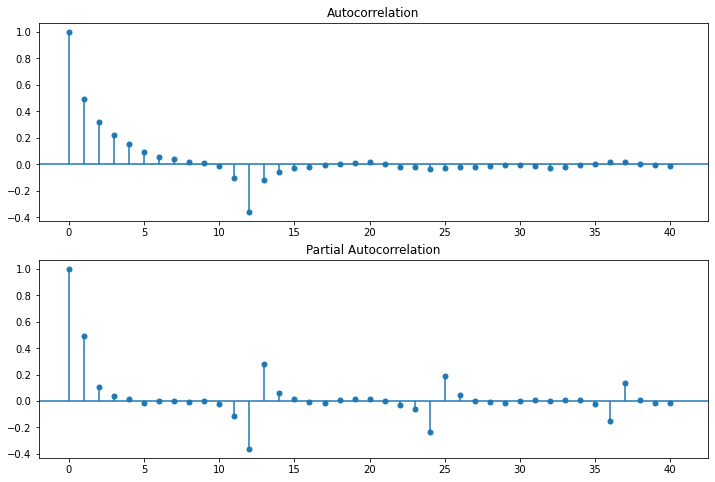

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)